<a href="https://colab.research.google.com/github/MarkNgendo/KNN-and-NB/blob/main/Mark_Ngendo_Moringa_Independent_Project_06_11_Core_W9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project: K-Nearest Neighbor Classification

## Loading Libraries

In [162]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

## Reading the data

In [56]:
train = pd.read_csv('train (5).csv')
test = pd.read_csv('test (1).csv')

## Checking the data

In [57]:
# Top of each dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
# Tail of each dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [61]:
# Checking whether each column has the appropriate dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Tidying the datasets

### Train

In [63]:
# checking the number of records
train.shape

(891, 12)

In [64]:
# checking for duplicates
train.duplicated().any()

False

In [65]:
# checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# The cabin column will be dropped and therefore, dropping null values is temporarily on hold.

In [67]:
# Dropping unnecessary columns that aren't integral to the analysis.

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

In [68]:
train.dropna(inplace=True)

In [69]:
train.reset_index(drop=True, inplace=True)
train.shape

(712, 7)

In [70]:
# checking for outliers
indexes = []
def outlier_detect(df):
  for i in df.describe().columns:
    q3 = df.describe().at['75%', i]
    q1 = df.describe().at['25%', i]
    iqr = q3 - q1

    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5

    outliers = []
    
    for pos, val in enumerate(df[i]):
      if val < lower or val > upper:
        outliers.append(val)
        if pos not in indexes:
          indexes.append(pos)
    
    print(f"Outlier count for {i} is {len(outliers)}")
    print(outliers)

In [71]:
# Calling the function on our train dataset
outlier_detect(train)

Outlier count for Survived is 0
[]
Outlier count for Pclass is 0
[]
Outlier count for Age is 8
[66.0, 71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]
Outlier count for SibSp is 35
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 5, 5, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]
Outlier count for Parch is 15
[5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5]


In [72]:
# These are few outliers and removing them does not compromise the dataset at all
len(indexes)

58

In [73]:
train.drop(indexes, axis=0, inplace=True)

In [74]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [76]:
# ensuring uniformity in column names
train.columns = train.columns.str.lower()

In [77]:
# Encoding the categorical columns
encoder = LabelEncoder()
train['sex'] = encoder.fit_transform(train['sex'])
train['embarked'] = encoder.fit_transform(train['embarked'])

In [78]:
train['age'] = train['age'].astype(int)

In [79]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22,1,0,2
1,1,1,0,38,1,0,0
2,1,3,0,26,0,0,2
3,1,1,0,35,1,0,2
4,0,3,1,35,0,0,2


### Test

In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
# number of records
test.shape

(418, 11)

In [83]:
# Dropping unnecessary columns
test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [85]:
test.duplicated().sum()

123

In [86]:
test.drop_duplicates(inplace=True)

In [87]:
# checking for null values
test.isnull().sum()

Pclass       0
Sex          0
Age         29
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [88]:
# dropping null values
test.dropna(inplace=True)

In [89]:
# Reindexing
test.reset_index(drop=True, inplace=True)

In [90]:
# Checking for outliers
indexes.clear()
outlier_detect(test)

Outlier count for Pclass is 0
[]
Outlier count for Age is 1
[76.0]
Outlier count for SibSp is 10
[3, 4, 5, 3, 4, 4, 8, 4, 3, 3]
Outlier count for Parch is 6
[3, 4, 6, 3, 5, 3]


In [93]:
# dropping outliers
test.drop(indexes, axis=0, inplace=True)

In [94]:
# uniformity in column names
test.columns = test.columns.str.lower()

In [95]:
# Encoding some categorical columns
test['sex'] = encoder.fit_transform(test['sex'])
test['embarked'] = encoder.fit_transform(test['embarked'])

In [96]:
# casting some columns
test['age'] = test['age'].astype(int)

In [145]:
test.head()

,pclass,sex,age,sibsp,parch,embarked
0,3,1,34,0,0,1
1,3,0,47,1,0,2
2,2,1,62,0,0,1
3,3,1,27,0,0,2
4,3,0,22,1,1,2


## Exploratory analysis

### Univariate analysis

In [100]:
# measures of central tendencies
for i in train.describe().columns:
  print("For " + i + " , central tendencies measures: ")
  print("Mean: ", train[i].mean())
  print("Mode: ", train[i].mode())
  print("Median: ", train[i].median())
  print("======================================")

For survived , central tendencies measures: 
Mean:  0.42201834862385323
Mode:  0    0
dtype: int64
Median:  0.0
For pclass , central tendencies measures: 
Mean:  2.2048929663608563
Mode:  0    3
dtype: int64
Median:  2.0
For sex , central tendencies measures: 
Mean:  0.6437308868501529
Mode:  0    1
dtype: int64
Median:  1.0
For age , central tendencies measures: 
Mean:  29.95565749235474
Mode:  0    24
dtype: int64
Median:  28.0
For sibsp , central tendencies measures: 
Mean:  0.3363914373088685
Mode:  0    0
dtype: int64
Median:  0.0
For parch , central tendencies measures: 
Mean:  0.29204892966360857
Mode:  0    0
dtype: int64
Median:  0.0
For embarked , central tendencies measures: 
Mean:  1.5779816513761469
Mode:  0    2
dtype: int64
Median:  2.0


In [101]:
# Measures of dispersion
for i in train.describe().columns:
  print("For " +i+ " , measures of dispersion:")
  print("Standard deviation: ", train[i].std())
  print("Variance: ", train[i].var())
  print("Kurtosis: ", train[i].kurt())
  print("Skewness: ", train[i].skew())
  print("*****************************************************")

For survived , measures of dispersion:
Standard deviation:  0.4942594438401179
Variance:  0.24429239782514264
Kurtosis:  -1.905653811911917
Skewness:  0.3165174074893695
*****************************************************
For pclass , measures of dispersion:
Standard deviation:  0.8379808212760024
Variance:  0.7022118568264035
Kurtosis:  -1.4619242416056641
Skewness:  -0.40065910919217973
*****************************************************
For sex , measures of dispersion:
Standard deviation:  0.4792626045910485
Variance:  0.22969264415939572
Kurtosis:  -1.643063346657206
Skewness:  -0.6016400101323364
*****************************************************
For age , measures of dispersion:
Standard deviation:  13.329245331741378
Variance:  177.66878111374933
Kurtosis:  0.013594839705735495
Skewness:  0.27552621263297783
*****************************************************
For sibsp , measures of dispersion:
Standard deviation:  0.5450513607899738
Variance:  0.2970809858990023
Kurto

In [102]:
# Frequency tables
train['sex'].value_counts()

1    421
0    233
Name: sex, dtype: int64

In [103]:
train['embarked'].value_counts()

2    505
0    127
1     22
Name: embarked, dtype: int64

In [104]:
train['pclass'].value_counts()

3    310
1    176
2    168
Name: pclass, dtype: int64

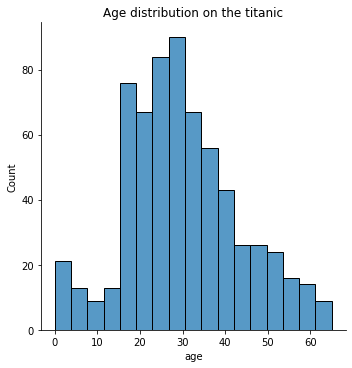

In [112]:
# Age distribution

sns.displot(x='age', data=train, palette='pastel')
plt.title('Age distribution on the titanic')
plt.show()

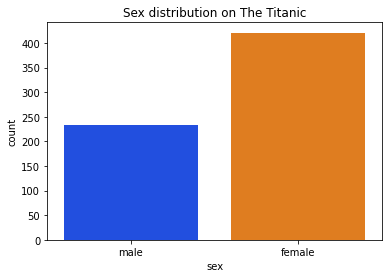

In [113]:
# Sex distribution
sns.countplot(x='sex', data=train, palette='bright')
plt.xticks(ticks=[0, 1], labels=['male', 'female'])
plt.title("Sex distribution on The Titanic")
plt.show()

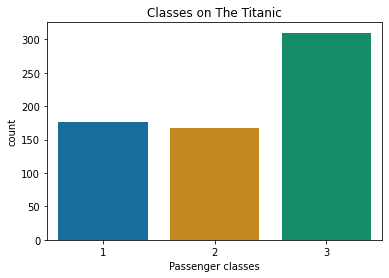

In [118]:
# Passenger classes distribution 
sns.countplot(x='pclass', data=train, palette='colorblind')
plt.title('Classes on The Titanic')
plt.xlabel('Passenger classes')
plt.show()

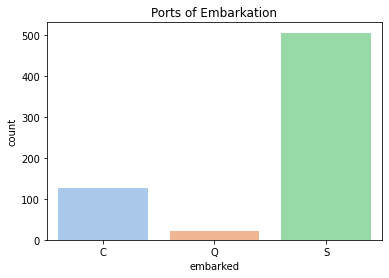

In [120]:
# Point of embarking
sns.countplot(x='embarked', data=train, palette='pastel')
plt.xticks(ticks=[0, 1, 2], labels=encoder.classes_)
plt.title('Ports of Embarkation')
plt.show()

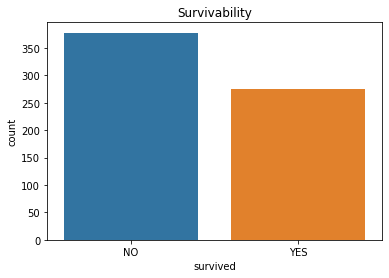

In [121]:
# Survivability on The titanic
sns.countplot(x='survived', data=train)
plt.title('Survivability')
plt.xticks(ticks=[0, 1], labels=['NO', 'YES'])
plt.show()

### Bivariate Analysis


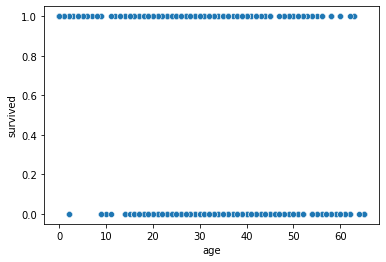

In [125]:
# Scatter plot of age on the ship
sns.scatterplot(x='age', y='survived', data=train)
plt.show()

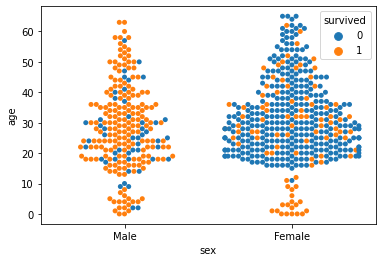

In [129]:
# Age vs sex with hue as survived
sns.swarmplot(x='sex', y='age', hue='survived', data=train)
plt.xticks(ticks=(0,1), labels=['Male', 'Female'])
plt.show()

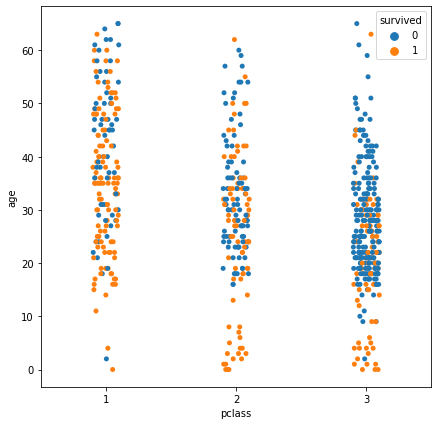

In [132]:
plt.figure(figsize=(7,7))
sns.stripplot(x='pclass', y='age', hue='survived', data=train)
plt.show()

## Solution implementation

In [142]:
# Splitting the training dataset
X = train.drop(['survived'], axis=1).values
y = train['survived'].values

### 80-20 split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [150]:
model1 = KNeighborsClassifier(n_neighbors=5)

model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
# accessing accuracy of the classifier
model1.score(X_test, y_test)

0.7175572519083969

In [152]:
# Confusion matrix of the first model

confusion_matrix(y_test, model1.predict(X_test))

array([[66, 20],
       [17, 28]])

### 70-30 split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [154]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
# assessing the accuracy
model2.score(X_test, y_test)

0.700507614213198

In [156]:
# Confusion matrix
confusion_matrix(y_test, model2.predict(X_test))

array([[94, 17],
       [42, 44]])

### 60-40 split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=13)

In [158]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [159]:
# Accuracy of the classifier
model3.score(X_test, y_test)

0.7175572519083969

In [160]:
# confusion matrix
confusion_matrix(y_test, model3.predict(X_test))

array([[122,  24],
       [ 50,  66]])

### Findings

with a :
* 20% test size, the accuracy is 71.8%
* 30% test size, the accuracy is 70.1%
* 40% test size, the accuracy is 71.8%

### Improvement attempt

To improve the model, the 80-20 one, GridSearch shall be used to find optimal parametrs. Also, the features shall be scaled as well to make the distance metric more meaningful

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=203)

# Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
parameters = [{'n_neighbors' : np.arange(1, 11),
               'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['auto', 'brute', 'ball_tree', 'kd_tree']}]

In [168]:
search = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=parameters,
                      scoring='accuracy',
                      refit=True,
                      cv=5)

search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'brute', 'ball_tree',
                                        'kd_tree'],
                          'metric': ['minkowski', 'euclidean', 'manhattan',
                                     'chebyshev'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [169]:
search.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [170]:
search.best_score_

0.801080586080586

A cross validated score of 80% is way better than the earlier 3 models.

In [171]:
# Improved model
clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', algorithm='brute', weights='uniform')

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [172]:
# Scoring the model
clf.score(X_test, y_test)

0.8396946564885496

In [173]:
# Cross validating these findings

cross_score = cross_val_score(estimator=clf,
                              X=X_train,
                              y=y_train,
                              cv=5)

cross_score

array([0.84761905, 0.8       , 0.79047619, 0.75961538, 0.80769231])

In [174]:
cross_score.mean()

0.801080586080586

In [176]:
# Cross val score is repetitive upon using GridSearchCV first

In [177]:
# Confusion matrix of the Improved model

confusion_matrix(y_test, clf.predict(X_test))

array([[75,  8],
       [13, 35]])

In [178]:
# Making predictions using the test data

# Unscaled
clf.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [179]:
# scaled
test = scaler.transform(test)

clf.predict(test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

## Recommendations to Imrpovements

Considering the low dimensionality of the dataset, k-d trees are applicable.